# **DATA PREPARE**

In [49]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [50]:
# Membaca dataset dari file CSV
df = pd.read_excel('dataset_penyakit2.xlsx')
df.shape

(50, 11)

In [51]:
df.head(10)

,USIA,JENIS_KELAMIN,SUHU_TUBUH,RIWAYAT_KESEHATAN,MENGGIGIL,DEMAM,TROMBOSIT,MUAL,RUAM,NYERI_SENDI,PENYAKIT
0,46,Wanita,38.0,Ya,Tidak,Ya,174098,Ya,Ya,Ya,Chikungunya
1,36,Wanita,39.9,Ya,Ya,Ya,165139,Ya,Tidak,Tidak,Malaria
2,24,Pria,38.1,Tidak,Tidak,Ya,157130,Ya,Ya,Ya,Chikungunya
3,32,Pria,40.1,Ya,Ya,Ya,169278,Ya,Tidak,Tidak,Malaria
4,35,Pria,39.7,Tidak,Ya,Ya,125936,Tidak,Ya,Ya,Demam Berdarah
5,45,Pria,39.5,Tidak,Ya,Ya,159127,Tidak,Tidak,Tidak,Malaria
6,34,Wanita,35.2,Tidak,Tidak,Tidak,213891,Tidak,Ya,Tidak,Tidak Terdiagnosis
7,47,Wanita,39.8,Ya,Ya,Ya,164481,Ya,Ya,Ya,Malaria
8,45,Pria,40.7,Ya,Ya,Ya,166596,Ya,Tidak,Tidak,Malaria
9,31,Wanita,40.0,Tidak,Ya,Ya,163658,Tidak,Tidak,Tidak,Malaria


In [52]:
values = {"RIWAYAT_KESEHATAN":{"Tidak":0, "Ya":1},
          "MENGGIGIL":{"Tidak":0, "Ya":1},
          "DEMAM":{"Tidak":0, "Ya":1},
          "MUAL":{"Tidak":0, "Ya":1},
          "RUAM":{"Tidak":0, "Ya":1},
          "NYERI_SENDI":{"Tidak":0, "Ya":1}
          }
df.replace(values, inplace=True)

In [53]:
yyy = df['PENYAKIT']
yyy.head(10)

0           Chikungunya
1               Malaria
2           Chikungunya
3               Malaria
4        Demam Berdarah
5               Malaria
6    Tidak Terdiagnosis
7               Malaria
8               Malaria
9               Malaria
Name: PENYAKIT, dtype: object

In [54]:
delete_columns = ['PENYAKIT','JENIS_KELAMIN','USIA']
xxx = df.drop(delete_columns, axis=1)

xxx.head(10)

,SUHU_TUBUH,RIWAYAT_KESEHATAN,MENGGIGIL,DEMAM,TROMBOSIT,MUAL,RUAM,NYERI_SENDI
0,38.0,1,0,1,174098,1,1,1
1,39.9,1,1,1,165139,1,0,0
2,38.1,0,0,1,157130,1,1,1
3,40.1,1,1,1,169278,1,0,0
4,39.7,0,1,1,125936,0,1,1
5,39.5,0,1,1,159127,0,0,0
6,35.2,0,0,0,213891,0,1,0
7,39.8,1,1,1,164481,1,1,1
8,40.7,1,1,1,166596,1,0,0
9,40.0,0,1,1,163658,0,0,0


In [55]:
xxx = pd.get_dummies(xxx)

print(df.groupby('PENYAKIT').size())

PENYAKIT
Chikungunya           12
Demam Berdarah         9
Malaria               15
Tidak Terdiagnosis    14
dtype: int64



# **DATA ANALYSIS**

In [56]:
x_standard = StandardScaler().fit_transform(xxx)
print(x_standard[0:10])

[[-0.19919509  0.96076892 -0.88640526  0.531085   -0.05331801  0.88640526
   0.88640526  0.88640526]
 [ 0.88214968  0.96076892  1.12815215  0.531085   -0.20438093  0.88640526
  -1.12815215 -1.12815215]
 [-0.14228221 -1.040833   -0.88640526  0.531085   -0.33942535  0.88640526
   0.88640526  0.88640526]
 [ 0.99597545  0.96076892  1.12815215  0.531085   -0.13459084  0.88640526
  -1.12815215 -1.12815215]
 [ 0.76832392 -1.040833    1.12815215  0.531085   -0.86540558 -1.12815215
   0.88640526  0.88640526]
 [ 0.65449815 -1.040833    1.12815215  0.531085   -0.30575277 -1.12815215
  -1.12815215 -1.12815215]
 [-1.7927558  -1.040833   -0.88640526 -1.88293774  0.61765496 -1.12815215
   0.88640526 -1.12815215]
 [ 0.8252368   0.96076892  1.12815215  0.531085   -0.21547586  0.88640526
   0.88640526  0.88640526]
 [ 1.33745274  0.96076892  1.12815215  0.531085   -0.17981361  0.88640526
  -1.12815215 -1.12815215]
 [ 0.93906256 -1.040833    1.12815215  0.531085   -0.22935294 -1.12815215
  -1.12815215 -1.

In [57]:
# Display basic statistics of the dataset
print(xxx.describe())

       SUHU_TUBUH  RIWAYAT_KESEHATAN  MENGGIGIL      DEMAM      TROMBOSIT  \
count    50.00000          50.000000  50.000000  50.000000      50.000000   
mean     38.35000           0.520000   0.440000   0.780000  177260.100000   
std       1.77491           0.504672   0.501427   0.418452   59908.523341   
min      35.20000           0.000000   0.000000   0.000000   79213.000000   
25%      36.42500           0.000000   0.000000   1.000000  151455.750000   
50%      38.45000           1.000000   0.000000   1.000000  161704.500000   
75%      39.90000           1.000000   1.000000   1.000000  211554.000000   
max      40.70000           1.000000   1.000000   1.000000  391871.000000   

            MUAL       RUAM  NYERI_SENDI  
count  50.000000  50.000000    50.000000  
mean    0.560000   0.560000     0.560000  
std     0.501427   0.501427     0.501427  
min     0.000000   0.000000     0.000000  
25%     0.000000   0.000000     0.000000  
50%     1.000000   1.000000     1.000000  
75%  

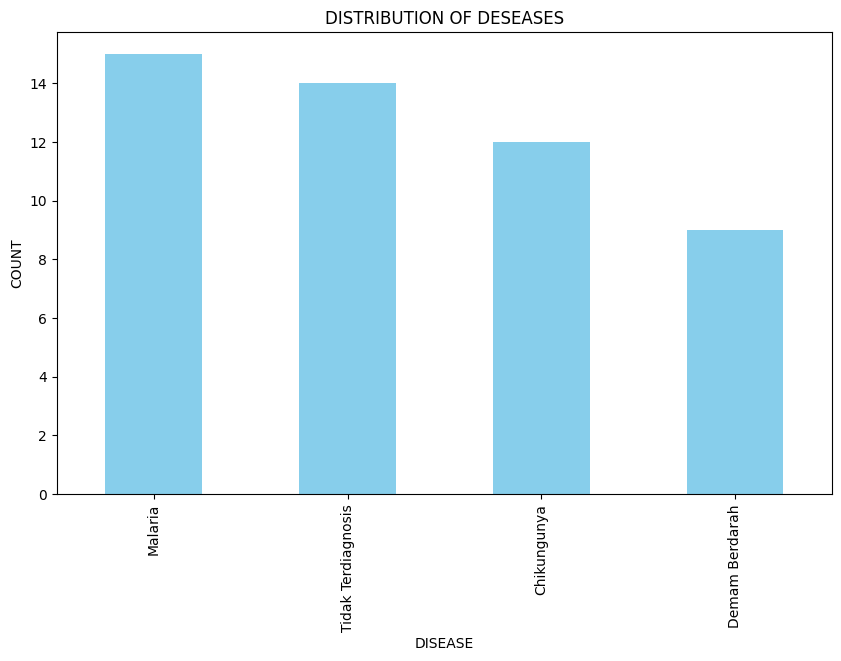

In [58]:
plt.figure(figsize=(10, 6))
yyy.value_counts().plot(kind='bar', color='skyblue')
plt.title('DISTRIBUTION OF DESEASES')
plt.xlabel('DISEASE')
plt.ylabel('COUNT')
plt.show()

In [59]:
# Membuat label biner untuk setiap penyakit
df['TIDAK_TERDIAGNOSIS'] = (df['PENYAKIT'] == 'Tidak Terdiagnosis').astype(int)
df['DEMAM_BERDARAH'] = (df['PENYAKIT'] == 'Demam Berdarah').astype(int)
df['MALARIA'] = (df['PENYAKIT'] == 'Malaria').astype(int)
df['CHIKUNGUNYA'] = (df['PENYAKIT'] == 'Chikungunya').astype(int)

In [60]:
correlation_matrix = df[['TIDAK_TERDIAGNOSIS', 'DEMAM_BERDARAH', 'MALARIA', 'CHIKUNGUNYA']].corr()

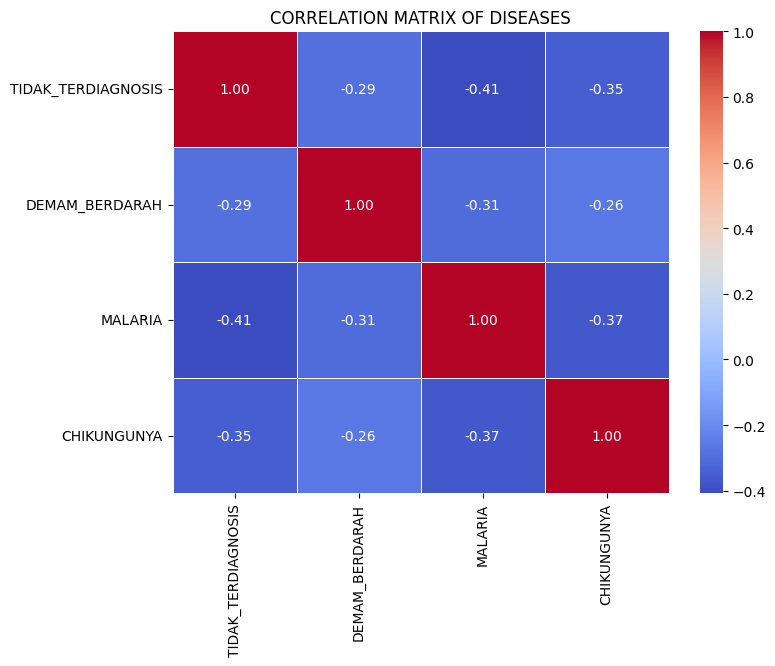

In [61]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('CORRELATION MATRIX OF DISEASES')
plt.show()

# **DATA TRAIN**

In [62]:
# Memisahkan dataset menjadi data latih dan data uji
# X_train, X_test, y_train, y_test = train_test_split(x, df[['TIDAK_TERDIAGNOSIS', 'DEMAM_BERDARAH', 'MALARIA', 'CHIKUNGUNYA']], test_size=0.2, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(xxx, yyy, test_size=0.2, stratify=yyy, random_state=5)

# # Train With Logistic Regression

In [63]:
# Melatih model Logistic Regression
model_lr_x = LogisticRegression(C=1)
model_lr_x.fit(X_train, y_train)

# Menguji model pada data uji
y_pred_lr_x = model_lr_x.predict(X_test)

# Mengukur kinerja model
accuracy_lr_x = accuracy_score(y_test, y_pred_lr_x)
classification_report_lr_x = classification_report(y_test, y_pred_lr_x)

In [64]:
y_pred_lr_x

array(['Tidak Terdiagnosis', 'Demam Berdarah', 'Tidak Terdiagnosis',
       'Chikungunya', 'Malaria', 'Malaria', 'Chikungunya', 'Chikungunya',
       'Tidak Terdiagnosis', 'Chikungunya'], dtype=object)

In [65]:
print('EVALUASI MODEL X (with LOGISTIC REGRESSION):')
print(f'Accuracy: {accuracy_lr_x:.2f}')
print('Classification Report:')
print(classification_report_lr_x)

EVALUASI MODEL X (with LOGISTIC REGRESSION):
Accuracy: 0.70
Classification Report:
                    precision    recall  f1-score   support

       Chikungunya       0.50      1.00      0.67         2
    Demam Berdarah       1.00      0.50      0.67         2
           Malaria       0.50      0.33      0.40         3
Tidak Terdiagnosis       1.00      1.00      1.00         3

          accuracy                           0.70        10
         macro avg       0.75      0.71      0.68        10
      weighted avg       0.75      0.70      0.69        10



# # Train With Decision Tree

In [66]:
# Melatih model Decision Tree
model_dt_x = DecisionTreeClassifier(criterion='entropy', max_depth=7)
model_dt_x.fit(X_train, y_train)

# Menguji model pada data uji
y_pred_dt_x = model_dt_x.predict(X_test)

# Mengukur kinerja model
accuracy_dt_x = accuracy_score(y_test, y_pred_dt_x)
classification_report_dt_x = classification_report(y_test, y_pred_dt_x)

In [67]:
y_pred_dt_x

array(['Tidak Terdiagnosis', 'Demam Berdarah', 'Tidak Terdiagnosis',
       'Chikungunya', 'Malaria', 'Malaria', 'Malaria', 'Chikungunya',
       'Tidak Terdiagnosis', 'Malaria'], dtype=object)

In [68]:
print('EVALUASI MODEL X (with DECISION TREE):')
print(f'Accuracy: {accuracy_dt_x:.2f}')
print('Classification Report:')
print(classification_report_dt_x)

EVALUASI MODEL X (with DECISION TREE):
Accuracy: 0.90
Classification Report:
                    precision    recall  f1-score   support

       Chikungunya       1.00      1.00      1.00         2
    Demam Berdarah       1.00      0.50      0.67         2
           Malaria       0.75      1.00      0.86         3
Tidak Terdiagnosis       1.00      1.00      1.00         3

          accuracy                           0.90        10
         macro avg       0.94      0.88      0.88        10
      weighted avg       0.93      0.90      0.89        10



# # Train With Random Forest

In [69]:
# Melatih model Random Forest
model_rf_x = RandomForestClassifier(n_estimators=100, random_state=0)
model_rf_x.fit(X_train, y_train)

# Menguji model pada data uji
y_pred_rf_x = model_rf_x.predict(X_test)

# Mengukur kinerja model
accuracy_rf_x = accuracy_score(y_test, y_pred_rf_x)
classification_report_rf_x = classification_report(y_test, y_pred_rf_x)

In [70]:
y_pred_rf_x

array(['Tidak Terdiagnosis', 'Demam Berdarah', 'Tidak Terdiagnosis',
       'Chikungunya', 'Malaria', 'Malaria', 'Malaria', 'Chikungunya',
       'Tidak Terdiagnosis', 'Malaria'], dtype=object)

In [71]:
print('EVALUASI MODEL X (with RANDOM FOREST):')
print(f'Accuracy: {accuracy_rf_x:.2f}')
print('Classification Report:')
print(classification_report_rf_x)

EVALUASI MODEL X (with RANDOM FOREST):
Accuracy: 0.90
Classification Report:
                    precision    recall  f1-score   support

       Chikungunya       1.00      1.00      1.00         2
    Demam Berdarah       1.00      0.50      0.67         2
           Malaria       0.75      1.00      0.86         3
Tidak Terdiagnosis       1.00      1.00      1.00         3

          accuracy                           0.90        10
         macro avg       0.94      0.88      0.88        10
      weighted avg       0.93      0.90      0.89        10



# **SYSTEM PREDICTION**

In [94]:
input_data = (39.7, 0, 1, 1, 125936, 0, 1, 1)

# changing data to numpy array
input_data_array = np.array(input_data)

# reshape the array as we are predicting for one instance
#input_data_reshaped =  input_data_array.reshape(1,-1)
input_data_reshaped =  input_data_array.reshape(1,-1)

# standarize the input data
std_data = preprocessing.scale(input_data_reshaped)
std_data_reshaped =  std_data.reshape(1,-1)

print(input_data_reshaped)

[[3.97000e+01 0.00000e+00 1.00000e+00 1.00000e+00 1.25936e+05 0.00000e+00
  1.00000e+00 1.00000e+00]]


In [95]:
result = model_lr_x.predict(input_data_reshaped)
print("The prediction disease is (LR) : ", result)

result = model_dt_x.predict(input_data_reshaped)
print("The prediction disease is (DT) : ", result)

result = model_rf_x.predict(input_data_reshaped)
print("The prediction disease is (RF) : ", result)

The prediction disease is (LR) :  ['Demam Berdarah']
The prediction disease is (DT) :  ['Demam Berdarah']
The prediction disease is (RF) :  ['Demam Berdarah']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [82]:
result = model_dt_x.predict(std_data_reshaped)
print("The prediction disease is (DT) : ", result)

The prediction disease is (DT) :  ['Tidak Terdiagnosis']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [83]:
result = model_rf_x.predict(std_data_reshaped)
print("The prediction disease is (RF) : ", result)

The prediction disease is (RF) :  ['Tidak Terdiagnosis']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# **IIMPORT PICKLE.PKL**

In [74]:
import pickle
pickle.dump(x_standard, open('scaler.pkl', 'wb'))
pickle.dump(model_lr_x, open('model-flask-lr_x.pkl', 'wb'))
pickle.dump(model_dt_x, open('model-flask-dt_x.pkl', 'wb'))
pickle.dump(model_rf_x, open('model-flask-rf_x.pkl', 'wb'))